# Calculating VaR using all three methods

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime 
import plotly.express as px
import pandas_datareader.data as web

### Now, once we have imported all the necessary libraries, let's import the top five stocks on NSE

In [31]:
tickers=['RELIANCE.NS','ITC.NS','TCS.NS','TATAMOTORS.NS','INFY.NS']
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
data  = yf.download(tickers, start = '2015-01-01', end = '2023-12-31')['Adj Close']
data

[*********************100%%**********************]  5 of 5 completed


Ticker,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2015-01-01,394.838837,185.128769,382.812164,489.917236,1054.449341
2015-01-02,402.597992,185.708649,381.799011,503.038696,1068.492188
2015-01-05,399.138428,186.439774,377.616913,514.833252,1052.254517
2015-01-06,390.799194,181.649567,360.478973,492.816742,1013.461182
2015-01-07,392.669067,178.271225,368.325775,485.395996,1001.490112
...,...,...,...,...,...
2023-12-22,1554.140869,440.793060,2565.050049,722.470520,3778.896729
2023-12-26,1535.297119,442.003510,2578.050049,717.336365,3750.782227
2023-12-27,1558.317383,442.632935,2586.850098,738.620667,3766.247559


In [32]:
data = pd.DataFrame(data)

In [33]:
data

Ticker,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2015-01-01,394.838837,185.128769,382.812164,489.917236,1054.449341
2015-01-02,402.597992,185.708649,381.799011,503.038696,1068.492188
2015-01-05,399.138428,186.439774,377.616913,514.833252,1052.254517
2015-01-06,390.799194,181.649567,360.478973,492.816742,1013.461182
2015-01-07,392.669067,178.271225,368.325775,485.395996,1001.490112
...,...,...,...,...,...
2023-12-22,1554.140869,440.793060,2565.050049,722.470520,3778.896729
2023-12-26,1535.297119,442.003510,2578.050049,717.336365,3750.782227
2023-12-27,1558.317383,442.632935,2586.850098,738.620667,3766.247559


In [34]:
data

Ticker,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2015-01-01,394.838837,185.128769,382.812164,489.917236,1054.449341
2015-01-02,402.597992,185.708649,381.799011,503.038696,1068.492188
2015-01-05,399.138428,186.439774,377.616913,514.833252,1052.254517
2015-01-06,390.799194,181.649567,360.478973,492.816742,1013.461182
2015-01-07,392.669067,178.271225,368.325775,485.395996,1001.490112
...,...,...,...,...,...
2023-12-22,1554.140869,440.793060,2565.050049,722.470520,3778.896729
2023-12-26,1535.297119,442.003510,2578.050049,717.336365,3750.782227
2023-12-27,1558.317383,442.632935,2586.850098,738.620667,3766.247559


In [35]:
data.head(30)

Ticker,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2015-01-01,394.838837,185.128769,382.812164,489.917236,1054.449341
2015-01-02,402.597992,185.708649,381.799011,503.038696,1068.492188
2015-01-05,399.138428,186.439774,377.616913,514.833252,1052.254517
2015-01-06,390.799194,181.649567,360.478973,492.816742,1013.461182
2015-01-07,392.669067,178.271225,368.325775,485.395996,1001.490112
2015-01-08,394.648834,182.733688,363.044220,503.235291,1012.301880
2015-01-09,414.846710,179.960403,370.912628,513.358948,1040.676392
2015-01-12,423.145874,180.439407,366.601166,513.358948,1039.599854
2015-01-13,417.736420,181.573898,363.518494,510.557739,1034.711426


### Calculating the daily returns of the stock portfolio

In [36]:
returns = data.pct_change()
returns

Ticker,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.019651,0.003132,-0.002647,0.026783,0.013318
2015-01-05,-0.008593,0.003937,-0.010954,0.023447,-0.015197
2015-01-06,-0.020893,-0.025693,-0.045384,-0.042764,-0.036867
2015-01-07,0.004785,-0.018598,0.021768,-0.015058,-0.011812
...,...,...,...,...,...
2023-12-22,0.017513,0.008307,0.000976,0.022360,0.009637
2023-12-26,-0.012125,0.002746,0.005068,-0.007106,-0.007440
2023-12-27,0.014994,0.001424,0.003413,0.029671,0.004123


In [37]:
px.line(returns, y = 'INFY.NS')

c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:

returns = returns.reset_index()
returns

Ticker,Date,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
0,2015-01-01,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,0.019651,0.003132,-0.002647,0.026783,0.013318
2,2015-01-05,-0.008593,0.003937,-0.010954,0.023447,-0.015197
3,2015-01-06,-0.020893,-0.025693,-0.045384,-0.042764,-0.036867
4,2015-01-07,0.004785,-0.018598,0.021768,-0.015058,-0.011812
...,...,...,...,...,...,...
2216,2023-12-22,0.017513,0.008307,0.000976,0.022360,0.009637
2217,2023-12-26,-0.012125,0.002746,0.005068,-0.007106,-0.007440
2218,2023-12-27,0.014994,0.001424,0.003413,0.029671,0.004123
2219,2023-12-28,-0.002840,0.015314,0.007229,0.017546,-0.002965


In [39]:
data = data.reset_index()
data.head(20)

Ticker,Date,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
0,2015-01-01,394.838837,185.128769,382.812164,489.917236,1054.449341
1,2015-01-02,402.597992,185.708649,381.799011,503.038696,1068.492188
2,2015-01-05,399.138428,186.439774,377.616913,514.833252,1052.254517
3,2015-01-06,390.799194,181.649567,360.478973,492.816742,1013.461182
4,2015-01-07,392.669067,178.271225,368.325775,485.395996,1001.490112
5,2015-01-08,394.648834,182.733688,363.044220,503.235291,1012.301880
6,2015-01-09,414.846710,179.960403,370.912628,513.358948,1040.676392
7,2015-01-12,423.145874,180.439407,366.601166,513.358948,1039.599854
8,2015-01-13,417.736420,181.573898,363.518494,510.557739,1034.711426
9,2015-01-14,425.685608,175.371902,359.983124,511.442291,1044.673828


In [40]:
data['Date'] = pd.to_datetime(data['Date'])

In [41]:
data.set_index('Date', inplace=True)

In [42]:
monthly_returns = data.resample('M').mean()

C:\Users\AdityaTheEmp\AppData\Local\Temp\ipykernel_11528\3022056572.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [43]:
monthly_returns.reset_index(inplace=True)

In [44]:
monthly_returns['Date'] = monthly_returns['Date'].dt.to_period('M')

In [45]:
monthly_returns.set_index('Date', inplace=True)

In [46]:
monthly_returns.reset_index()
monthly_returns

Ticker,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2015-01,418.163522,181.666381,377.867369,531.975188,1039.868681
2015-02,450.554617,192.065943,384.110138,563.165174,1072.588755
2015-03,445.707338,168.636785,368.050650,546.095927,1083.627662
2015-04,424.862533,172.837454,379.199633,535.032178,1052.355617
2015-05,397.596524,164.029185,386.270509,502.622758,1057.329700
...,...,...,...,...,...
2023-08,1373.487871,435.544156,2498.031128,612.294592,3369.411776
2023-09,1450.553564,432.017383,2405.040002,620.771844,3477.409985
2023-10,1409.356091,427.260365,2307.859985,637.751944,3451.124646


In [4]:
returns = pd.read_excel("C:\\Users\\AdityaTheEmp\\Desktop\\Projects\\Portfolio construction course\\Applied projects\\Monthly returns data.xlsx"
                        , parse_dates= True)

In [ ]:
! pip install  --upgrade openpyxl

In [55]:
returns

,Date,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
0,2015-01-01,418.163522,181.666381,377.867369,531.975188,1039.868681
1,2015-02-01,450.554617,192.065943,384.110138,563.165174,1072.588755
2,2015-03-01,445.707338,168.636785,368.050650,546.095927,1083.627662
3,2015-04-01,424.862533,172.837454,379.199633,535.032178,1052.355617
4,2015-05-01,397.596524,164.029185,386.270509,502.622758,1057.329700
...,...,...,...,...,...,...
103,2023-08-01,1373.487871,435.544156,2498.031128,612.294592,3369.411776
104,2023-09-01,1450.553564,432.017383,2405.040002,620.771844,3477.409985
105,2023-10-01,1409.356091,427.260365,2307.859985,637.751944,3451.124646
106,2023-11-01,1407.049915,422.367772,2351.357471,664.923093,3388.938599


In [5]:
returns.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

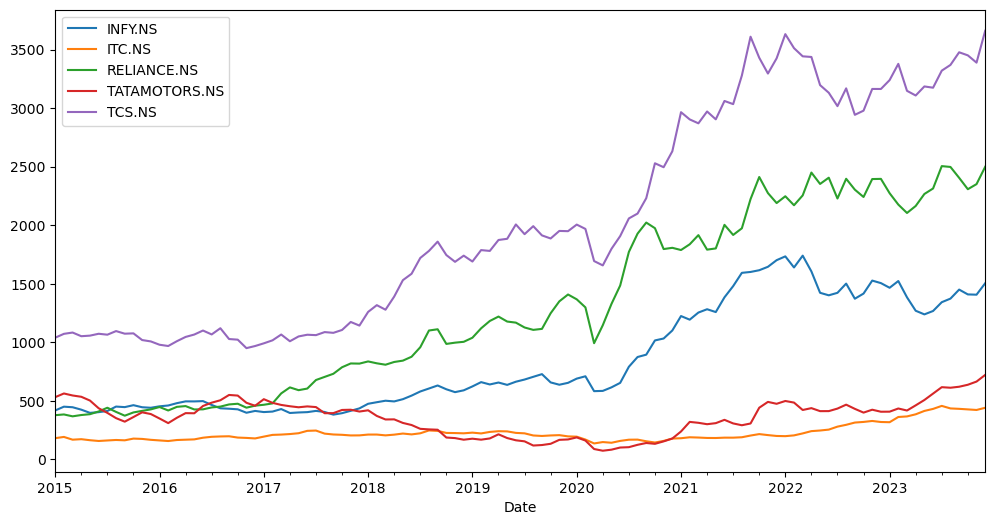

In [51]:
returns.plot.line(figsize=(12, 6))

In [52]:
returns.loc["2017"]

,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2017-01-01,404.420301,194.821379,466.854508,514.499051,991.572716
2017-02-01,408.626118,209.524701,478.486627,483.221787,1017.168319
2017-03-01,430.170722,212.191370,563.942366,465.426842,1066.709600
2017-04-01,396.600469,216.678262,615.180708,454.150925,1009.330641
2017-05-01,401.075878,223.706682,591.427177,445.383170,1050.449158
2017-06-01,403.833136,244.029972,605.179871,452.810835,1064.970907
2017-07-01,414.422469,246.524737,678.191357,447.079777,1061.555687
2017-08-01,405.171122,220.304171,704.941127,394.591557,1087.541004
2017-09-01,382.525898,212.985889,731.505557,395.341662,1081.147554


#### Now that we have done all the background work, cleaned the data and got the data into our required formatting, we go ahead and create our own library and calculate all the necessary metrics.

Compute drawdowns:
1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown - which is wealth value as a percentage of the previous peak

Let's try and calculate the max drawdown of infosys stock price first and then define a function in our library to calculate the max drawdown of any stock we want.

In [6]:
wealth_index = 1000*(1 + returns['INFY.NS']/100).cumprod()
wealth_index.head()

Date
2015-01-01    5.181635e+03
2015-02-01    2.852773e+04
2015-03-01    1.556779e+05
2015-04-01    8.170951e+05
2015-05-01    4.065837e+06
Name: INFY.NS, dtype: float64

<Axes: >

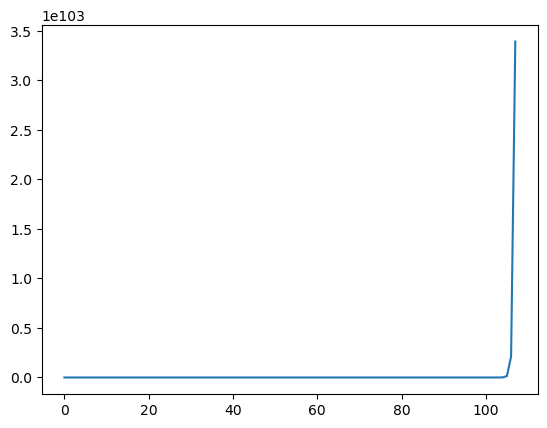

In [59]:
wealth_index.plot.line()

In [60]:
previous_peaks = wealth_index.cummax()

<Axes: >

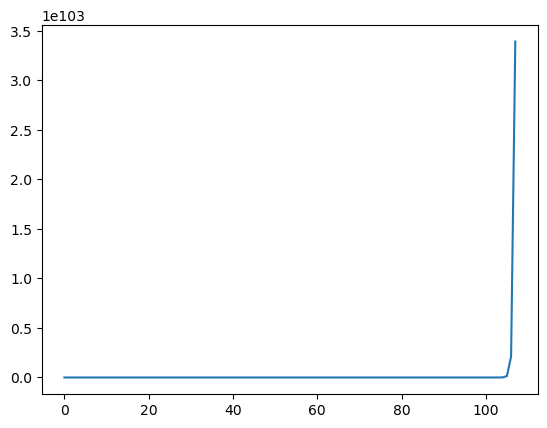

In [61]:
previous_peaks.plot()

Something seems off. Let's troubleshoot

In [62]:
print(returns.dtypes)

Date             datetime64[ns]
INFY.NS                 float64
ITC.NS                  float64
RELIANCE.NS             float64
TATAMOTORS.NS           float64
TCS.NS                  float64
dtype: object


In [63]:
returns.pct_change()

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [5]:
returns['Date'] = pd.to_datetime(returns['Date'])

KeyError: 'Date'

In [7]:
returns.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [8]:
returns = returns.pct_change()
returns

,INFY.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS,TCS.NS
Date,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.077460,0.057245,0.016521,0.058631,0.031466
2015-03-01,-0.010758,-0.121985,-0.041810,-0.030309,0.010292
2015-04-01,-0.046768,0.024910,0.030292,-0.020260,-0.028859
2015-05-01,-0.064176,-0.050963,0.018647,-0.060575,0.004727
...,...,...,...,...,...
2023-08-01,0.022812,-0.047327,-0.002830,-0.007767,0.014727
2023-09-01,0.056109,-0.008097,-0.037226,0.013845,0.032053
2023-10-01,-0.028401,-0.011011,-0.040407,0.027353,-0.007559


In [9]:
wealth_index = 1000*(1 + returns['INFY.NS']).cumprod()
wealth_index.head()

Date
2015-01-01            NaN
2015-02-01    1077.460355
2015-03-01    1065.868529
2015-04-01    1016.020075
2015-05-01     950.815897
Name: INFY.NS, dtype: float64

<Axes: xlabel='Date'>

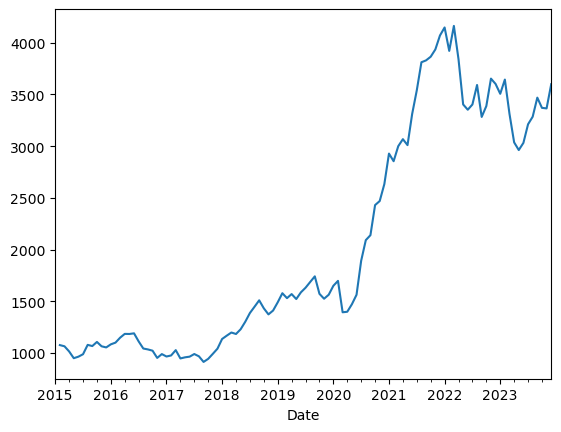

In [8]:
wealth_index.plot()

Let's calculate the previous peaks now:

In [10]:
previous_peaks= wealth_index.cummax()

<Axes: xlabel='Date'>

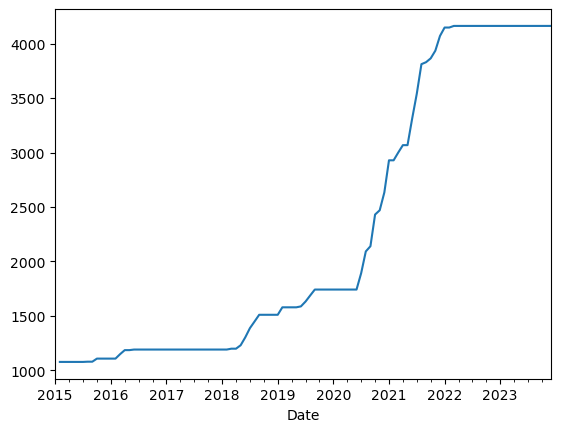

In [10]:
previous_peaks.plot()

In [11]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown

Date
2015-01-01         NaN
2015-02-01    0.000000
2015-03-01   -0.010758
2015-04-01   -0.057023
2015-05-01   -0.117540
                ...   
2023-08-01   -0.210825
2023-09-01   -0.166545
2023-10-01   -0.190216
2023-11-01   -0.191541
2023-12-01   -0.135254
Name: INFY.NS, Length: 108, dtype: float64

<Axes: xlabel='Date'>

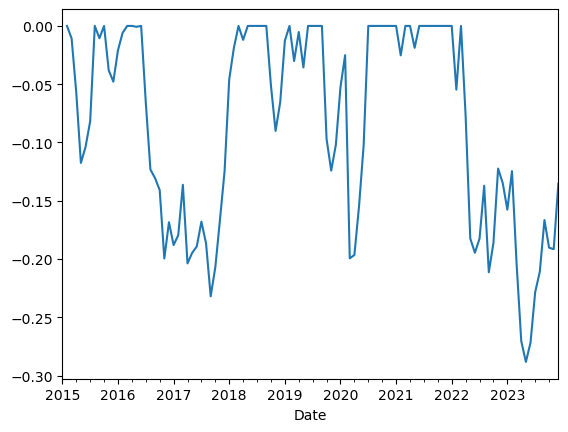

In [12]:
drawdown.plot()

Now, let's understand when did the highest drawdown happen

In [12]:
drawdown.idxmin()
#idxmin basically means the index of the minimum value for the drawdown

Timestamp('2023-05-01 00:00:00')

Hence, the biggest fall from its previous peak happened in May 2023

In [13]:
def drawdown(return_series : pd.Series):
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth' : wealth_index,
        'Previous Peaks': previous_peaks,
        'Drawdown': drawdown
    })

In [14]:
drawdown(returns['RELIANCE.NS'])

,Wealth,Previous Peaks,Drawdown
Date,,,
2015-01-01,NaN,NaN,NaN
2015-02-01,1016.521058,1016.521058,0.000000
2015-03-01,974.020729,1016.521058,-0.041810
2015-04-01,1003.525745,1016.521058,-0.012784
2015-05-01,1022.238332,1022.238332,0.000000
...,...,...,...
2023-08-01,6610.867547,6629.631516,-0.002830
2023-09-01,6364.772930,6629.631516,-0.039951
2023-10-01,6107.592700,6629.631516,-0.078743


<Axes: xlabel='Date'>

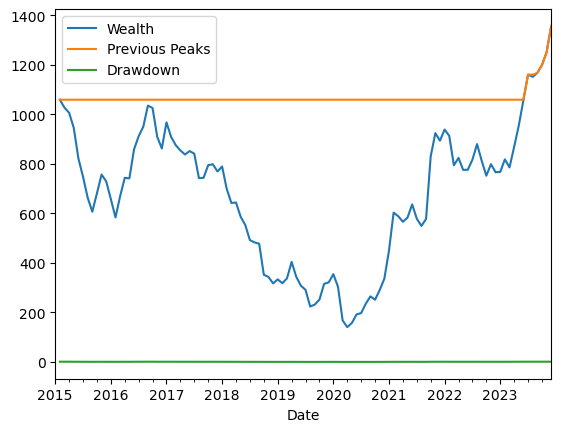

In [18]:
drawdown(returns['TATAMOTORS.NS']).plot()

Formula for value at risk using the gaussian method is given by:

$$
\text{VaR}_\alpha = -(\mu + z_\alpha \sigma)
$$


Where $\mu$ is the expected monthly returns(mean) and $\sigma$ is the expected volatility(standard deviation)


In [1]:
import pandas as pd
import numpy as np

We now calculate the value at risk using the following three methods:
- Historical method
- Gaussian method
- Cornish-Fisher method

In [2]:
def var_historic(r, level =5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate (var_historic, level = level)  
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError ("Expected r to be a Series or a DataFrame")


In [18]:
var_historic(returns['INFY.NS'], level = 5)

nan

In [19]:
np.percentile(returns['RELIANCE.NS'], 5, axis = 0)

nan

In [20]:
returns = returns.dropna()

In [21]:
np.percentile(returns['RELIANCE.NS'], 5, axis = 0)

-0.07297318951251097

In [28]:
historical = var_historic(returns, level =5)

<Axes: >

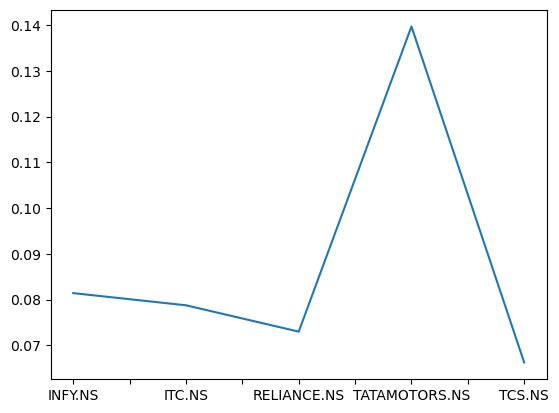

In [23]:
var_historic(returns, level =5).plot()

What this tells us is that there is a 5% chance that the losses would be greater than or equal to 13.9% for holders of the stock of tatamotors (and vice versa for all other stocks mentioned).
From the graph, it is also seen that TCS has the lowest value at risk (historical) and tatamotors has the highest

## Gaussian VaR

In [24]:
import scipy.stats as stats

In [25]:
def var_gaussian(r, level = 5, modified = False):
    z = stats.norm.ppf(level/100)
    if modified:
        #modify the z score based on the skewness and kurtosis:
        s = stats.skew(r)
        k = stats.kurtosis(r)
        z = (z + (z**2 - 1) * s / 6 +
            (z**3 - 3 * z) * (k - 3) / 24 -
            (2 * z**3 - 5 * z) * (s**2) / 36)
    return -(r.mean() + z * r.std(ddof=0))

In [27]:
gaussian = var_gaussian(returns, level = 5, modified = False)

In [29]:
cornish_fisher = var_gaussian(returns, modified = True)

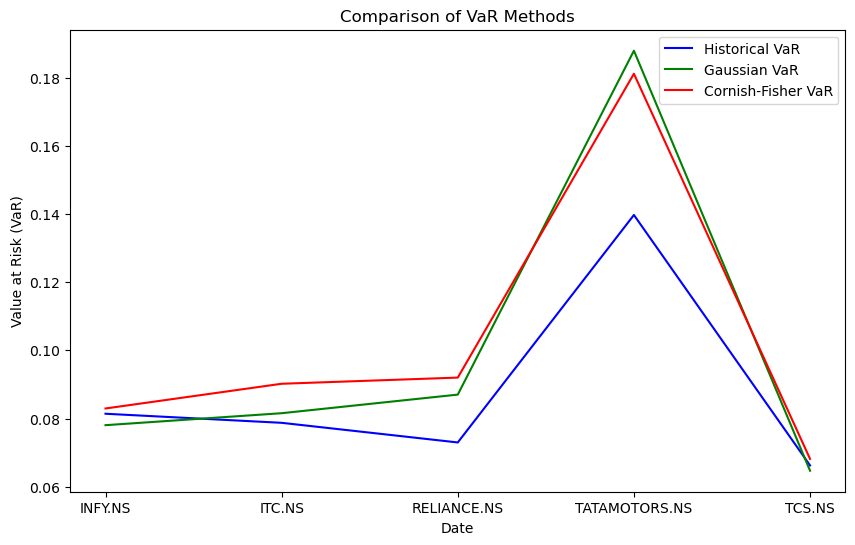

In [32]:
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each series
plt.plot(historical, label='Historical VaR', color='blue')
plt.plot(gaussian, label='Gaussian VaR', color='green')
plt.plot(cornish_fisher, label='Cornish-Fisher VaR', color='red')

# Adding titles and labels
plt.title('Comparison of VaR Methods')
plt.xlabel('Date')
plt.ylabel('Value at Risk (VaR)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()


From the graph, we can see that the gaussian VaR shows the highest risk, magnitude-wise, and historical shows the lowest. Cornish-Fisher VaR, the most commonly used method in parametric estimation, lies in the middle